# Analysis of Siren based trained models vs JPEG
---
- enable dark mode jupiter:
    - jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
- disable set theme:
    - jt -r

### Fetch Libs, and Data
---

In [1]:
# --- Import libs for running notebook.
from utils.libs import *

In [2]:
# --- Read config file for runnig notebook.
conf_file_path = 'conf.txt'
conf_data = read_conf_file(conf_file_path)
# pprint(conf_data)

In [3]:
# --- Define named tuple for query db to retrieve data.
# --- And, choose constraints to focus on certain Training runs.
constraints = get_constraints_for_query_db()

QueryConstraints(image={'type': <class 'str'>, 'val': ['cameramen']}, date=None, timestamp={'type': <class 'str'>, 'val': ['']}, hidden_features={'type': <class 'int'>, 'val': ['']}, image_size={'type': <class 'str'>, 'val': ['[256,256]']}, status={'type': <class 'str'>, 'val': ['done']})


In [4]:
# --- Fetch data about carryed out trainings.
# train_df, _, records_list = fetch_data(conf_data)
records_list, result_dict_df, query_str, chained_constraints = fetch_data_by_constraints(
    conf_data, constraints, fetch_data_downloaded = True)

SELECT image,date,timestamp,hidden_features,image_size,status,data_downloaded FROM table_runs_logged WHERE   (image = 'cameramen') AND (image_size = '[256,256]')  AND (status = 'done') ;


In [5]:
data = list(map(operator.methodcaller('_asdict'), records_list))
records_df = pd.DataFrame(data = data)

records_df.head(5)

,image,date,timestamp,hidden_features,image_size,status,data_downloaded,full_path
0,cameramen,23/10/20,1603478755-305517,75,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
1,cameramen,24/10/20,1603557121-338703,55,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
2,cameramen,25/10/20,1603583765-067812,55,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
3,cameramen,26/10/20,1603672968-148557,85,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
4,cameramen,26/10/20,1603731938-952001,85,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...


In [6]:
data = list(map(operator.itemgetter(1), result_dict_df.items()))
siren_df = pd.concat(data)

siren_df.head(5)

,#params,seed,hl,hf,mse,psnr,ssim,eta
1603478755-305517,57301.0,0.0,10.0,75.0,0.000006,58.145780,0.998769,2688.703879
1603478755-305517,57301.0,42.0,10.0,75.0,0.000009,56.492704,0.998202,2690.827056
1603478755-305517,57301.0,123.0,10.0,75.0,0.000006,58.214385,0.999085,2686.608420
1603478755-305517,63001.0,0.0,11.0,75.0,0.000018,53.486111,0.997542,2904.513145
1603478755-305517,63001.0,42.0,11.0,75.0,0.000005,58.401365,0.999003,2906.302068


In [7]:
siren_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1603478755-305517 to 1603905451-45262
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #params  144 non-null    float64
 1   seed     144 non-null    float64
 2   hl       144 non-null    float64
 3   hf       144 non-null    float64
 4   mse      144 non-null    float64
 5   psnr     144 non-null    float64
 6   ssim     144 non-null    float64
 7   eta      144 non-null    float64
dtypes: float64(8)
memory usage: 10.1+ KB


In [8]:
siren_df.describe()

,#params,seed,hl,hf,mse,psnr,ssim,eta
count,144.00000,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000
mean,41568.00000,55.000000,8.291667,69.875000,5.240141e-05,52.023422,0.995642,1989.981213
std,21472.18496,51.227178,3.205928,15.014154,7.406398e-05,5.404762,0.005447,652.588717
min,9461.00000,0.000000,3.000000,45.000000,9.706207e-07,39.305184,0.959150,913.606552
25%,24913.50000,0.000000,5.750000,55.000000,1.043584e-05,48.062040,0.994240,1494.889452
50%,37036.00000,42.000000,8.500000,64.000000,2.263126e-05,52.513548,0.997453,1936.896151
75%,57398.50000,123.000000,11.000000,85.000000,6.222262e-05,55.851124,0.998854,2372.567649
max,95371.00000,123.000000,13.000000,90.000000,4.519178e-04,65.722240,0.999817,3499.902338


### Calculate Jpge
---

Image size: (512, 512)


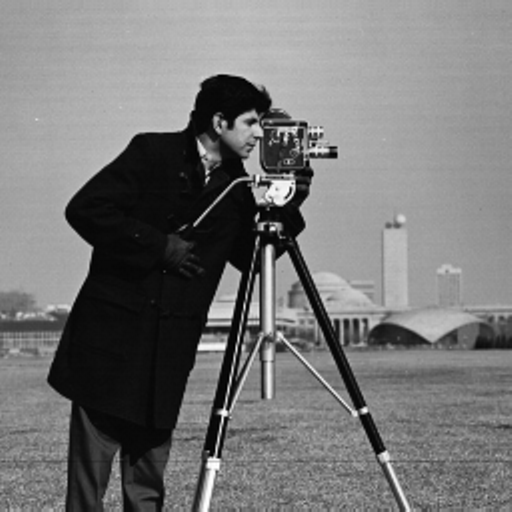

In [9]:
# --- Load target image.
im = load_target_image(image_file_path = None)
print('Image size:', im.size)
im

In [10]:
crop_size = conf_data['cropped_image']['crop_size']
if isinstance(crop_size, str):
    crop_size = eval(crop_size)
elif isinstance(crop_size, int):
    crop_size = (crop_size, crop_size)
    pass
# type(crop_size[0])

Image size: (256, 256)


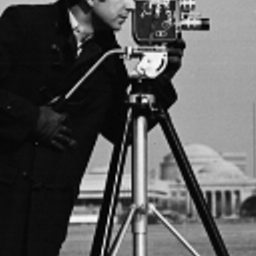

In [11]:
if conf_data['cropped_image']['flag'] is True:
    im_cropped = get_cropped_by_center_image(im, target = crop_size)
    pass
else:
    im_cropped = im
print('Image size:', im_cropped.size)
im_cropped

In [12]:
# --- Array of qualities to be tested in compression.
qualities_arr = np.arange(20, 95+1, dtype = np.int)

In [13]:
# --- Run several trials for JPEG compression.

cropped_file_size_bits = None

# im_cropped = im
# im_cropped = Image.fromarray(skimage.data.camera())
with BytesIO() as f:
    im_cropped.save(f, format='PNG')
    cropped_file_size_bits = f.getbuffer().nbytes * 8
    pass

result_tuples, failure_qualities = \
  calculate_several_jpeg_compression(im_cropped, cropped_file_size_bits, qualities_arr)

In [14]:
# data = list(map(lambda xx: xx._asdict(), result_tuples))
data = list(map(operator.methodcaller('_asdict'), result_tuples))
jpeg_df = pd.DataFrame(data = data)
jpeg_df.head(5)

,psnr,ssim,quality,file_size_bits,bpp,width,heigth,CR
0,33.270993,0.939424,20,33064,0.504517,256,256,7.682071
1,33.514350,0.940436,21,33968,0.518311,256,256,7.477626
2,33.684117,0.941620,22,34736,0.530029,256,256,7.312298
3,33.928492,0.944786,23,35408,0.540283,256,256,7.173520
4,34.115361,0.946817,24,36000,0.549316,256,256,7.055556


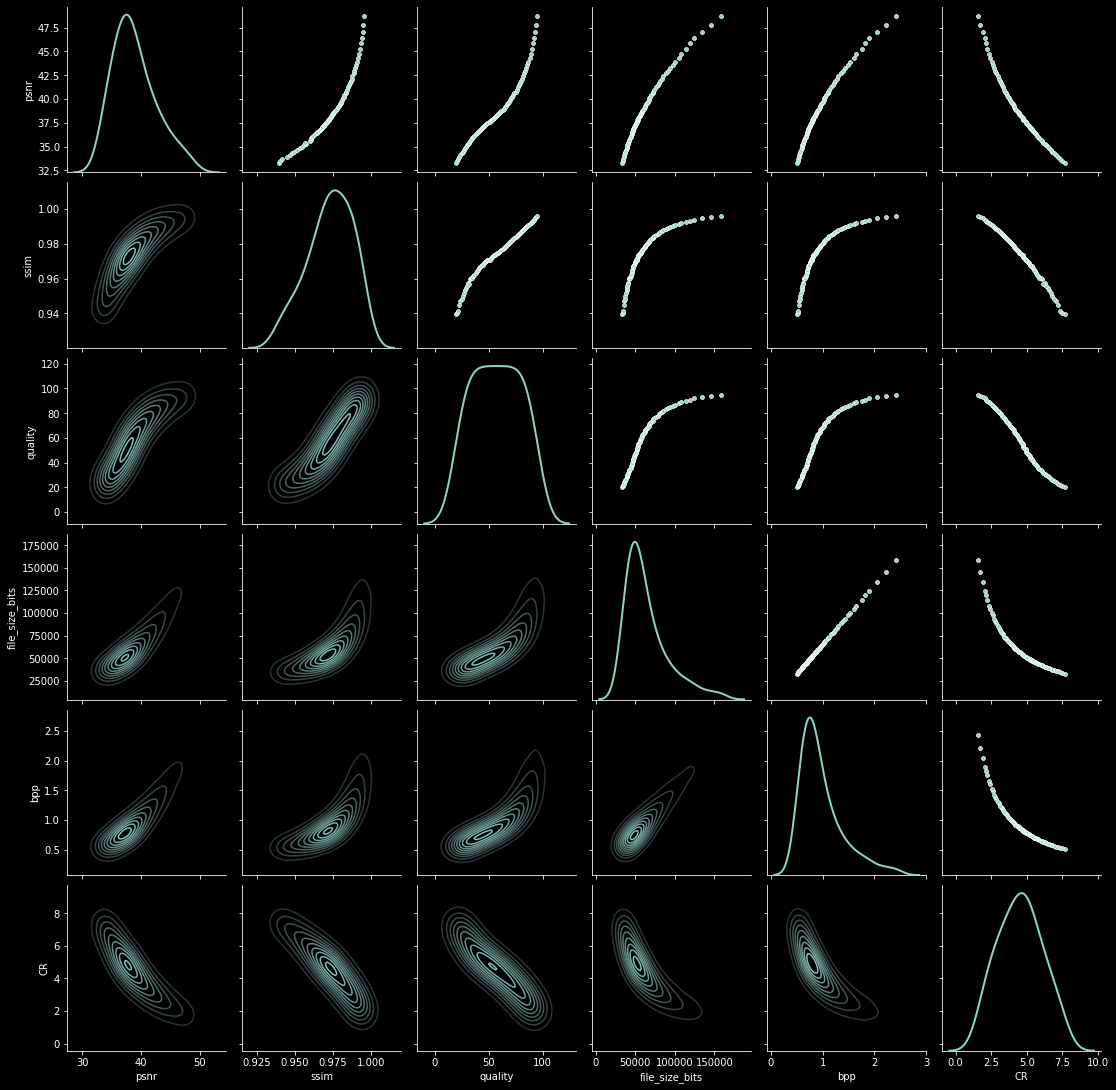

In [15]:
# sns.pairplot(results_history_df)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    try:
        g = sns.PairGrid(jpeg_df.drop(['width', 'heigth'], axis = 1), diag_sharey=False)
        g.map_upper(sns.scatterplot, s=15) # 
        g.map_lower(sns.kdeplot)
        g.map_diag(sns.kdeplot, lw=2)
        # plt.savefig(f"{images_conf.df_jpeg_scatterplot}")
    except Exception as err:
        print(str(err))
        pass
    pass

### Show graphics: 
---

#### Graphics about:
- merged JPEG Dataframe and Siren Dataframe

#### First, Merge Dataframes

In [16]:
# Metadata for merging dataframes.
vars_dict = dict(
    image=im_cropped,                                                                  # Target Image , either cropped or not.
    siren_columns_for_merge="psnr,ssim,CR,bpp,file_size_bits,compression".split(","),  # Here, list siren_df columns for merge purpose.
    jpeg_columns_for_merge="psnr,ssim,CR,bpp,file_size_bits,compression".split(","),   # Here, list jpeg_df columns for merge purpose.
    columns_names_merge="psnr,ssim,CR,bpp,file_size_bits,compression".split(","),      # Here, list new columns name after merge.
)
# vars_dict

In [17]:
# Perform merging.
merged_df, siren_df, jpeg_df = prepare_and_merge_target_dfs(
    siren_df, jpeg_df,
    **vars_dict
)

#### Scatterplot Graphic:
Scatter plot about merged **siren_df**, and **jpeg_df**:

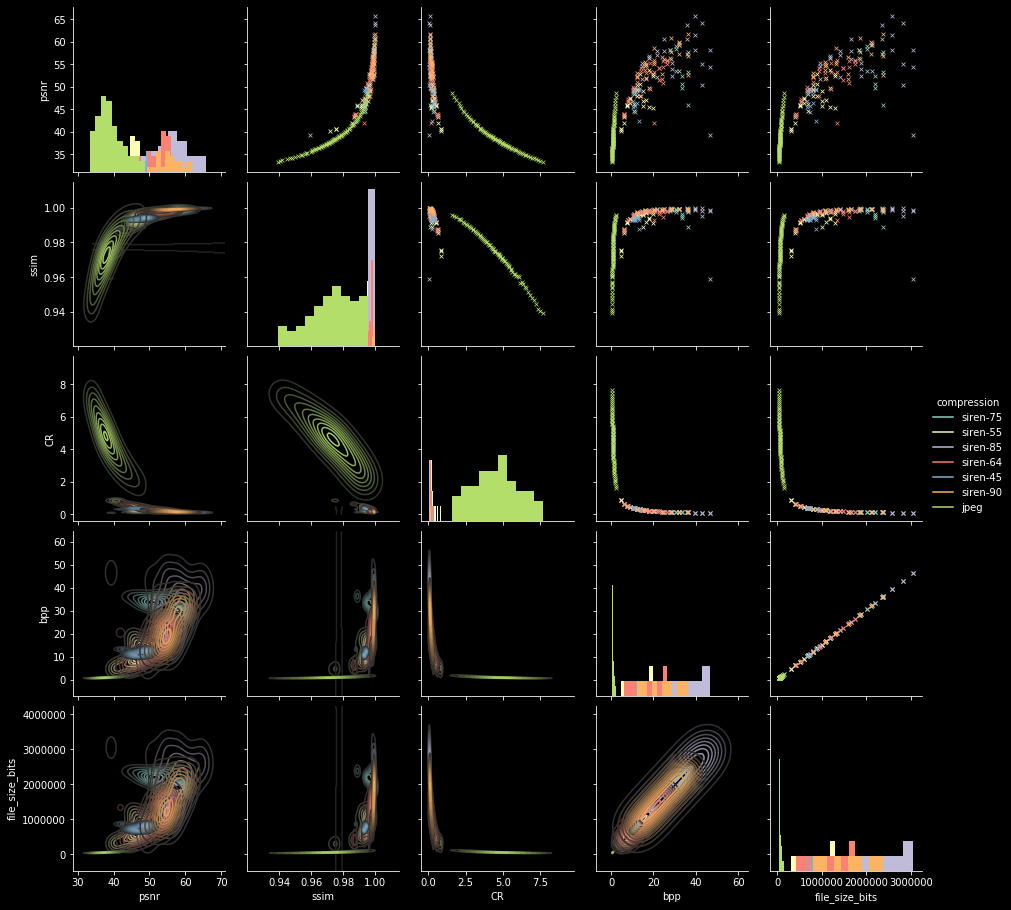

In [18]:
g = sns.PairGrid(merged_df, hue="compression")
g.map_diag(plt.hist)
# g.map_offdiag(sns.scatterplot, marker='x')
g.map_upper(sns.scatterplot, marker='x', s=15) 
g.map_lower(sns.kdeplot)
g.add_legend()
# g.savefig("scatter_plot_dataframes_merged.png")
plt.show()

#### Scatterplot Graphic (PSNR vs. BPP):
Scatter plot about merged siren_df, and jpeg_df, where PSNR vs. BPP is shown:
 -  firstly, without making distinction amongst several siren-trials,
 - then, showing also how several siren-trials behave.

In [34]:
tmp_res = [merged_df.groupby(by = ['compression']).min(), merged_df.groupby(by = ['compression']).max()]
pd.concat(tmp_res, names = names, axis=1)

,psnr,ssim,CR,bpp,file_size_bits,psnr,ssim,CR,bpp,file_size_bits
compression,,,,,,,,,,
jpeg,33.270993,0.939424,1.598449,0.504517,33064.0,48.693716,0.995725,7.682071,2.424683,158904.0
siren-45,42.369062,0.987958,0.292994,10.195801,668192.0,49.639914,0.994646,0.380130,13.228027,866912.0
siren-55,40.158850,0.971919,0.197151,4.619629,302752.0,54.804481,0.997690,0.838971,19.658691,1288352.0
siren-64,41.880483,0.986566,0.146079,6.219238,407584.0,55.984903,0.998540,0.623184,26.531738,1738784.0
siren-75,46.030593,0.988788,0.106685,27.979004,1833632.0,59.208228,0.999173,0.138523,36.328613,2380832.0
siren-85,39.305184,0.959150,0.083228,10.874512,712672.0,65.722240,0.999817,0.356405,46.567871,3051872.0
siren-90,49.422984,0.996646,0.107161,12.173340,797792.0,61.784156,0.999628,0.318379,36.167480,2370272.0


In [40]:
x = 'bpp'; y = "psnr"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}",  # size='' # hover_data=[f"{y}"])
                )
fig.show()

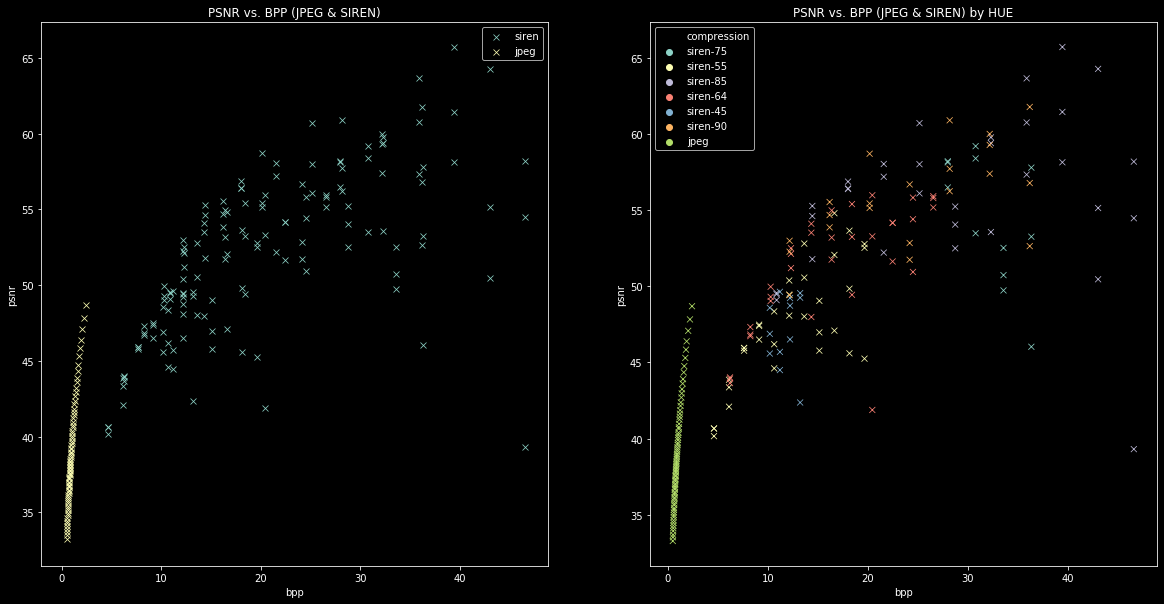

In [19]:
x = 'bpp'; y = "psnr"
fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])
axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by HUE')
plt.show()

#### Scatterplot Graphic (MSE vs. BPP):

In [42]:
x = 'bpp'; y = "mse"; hue='compression'
fig = px.scatter(siren_df, x=f"{x}", y=f"{y}", color=f"{hue}",)
fig.show()

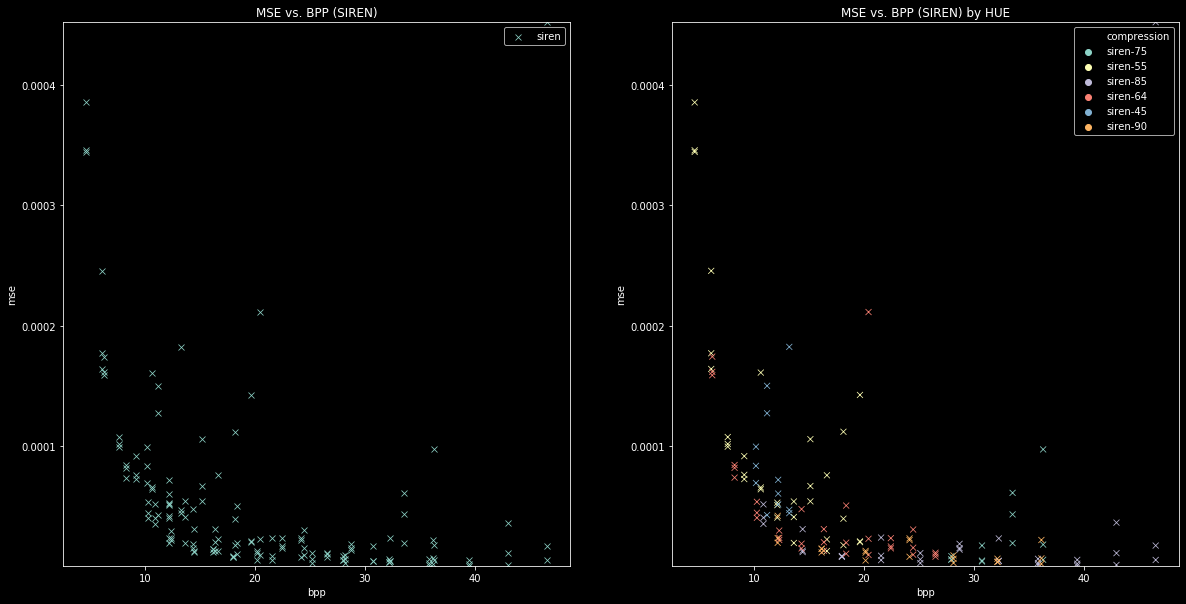

In [21]:
x = 'bpp'; y = "mse"
fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
axes[0].set_title(f'{y.upper()} vs. {x.upper()} (SIREN)')
axes[0].set_ylim(siren_df[y].values.min(), siren_df[y].values.max())

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=siren_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (SIREN) by HUE')
axes[1].set_ylim(siren_df[y].values.min(), siren_df[y].values.max())
plt.show()

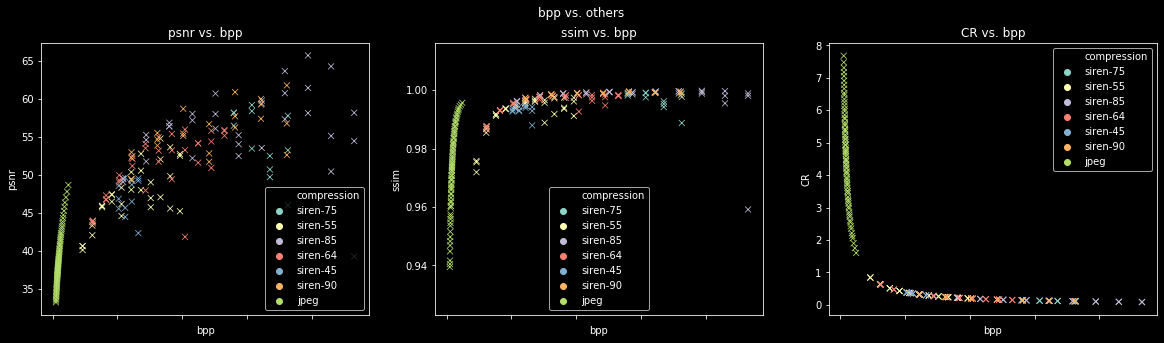

In [43]:
hue = "compression"; x = 'bpp'
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")

fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")

for ax, y in zip(axes, y_vars):
    chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

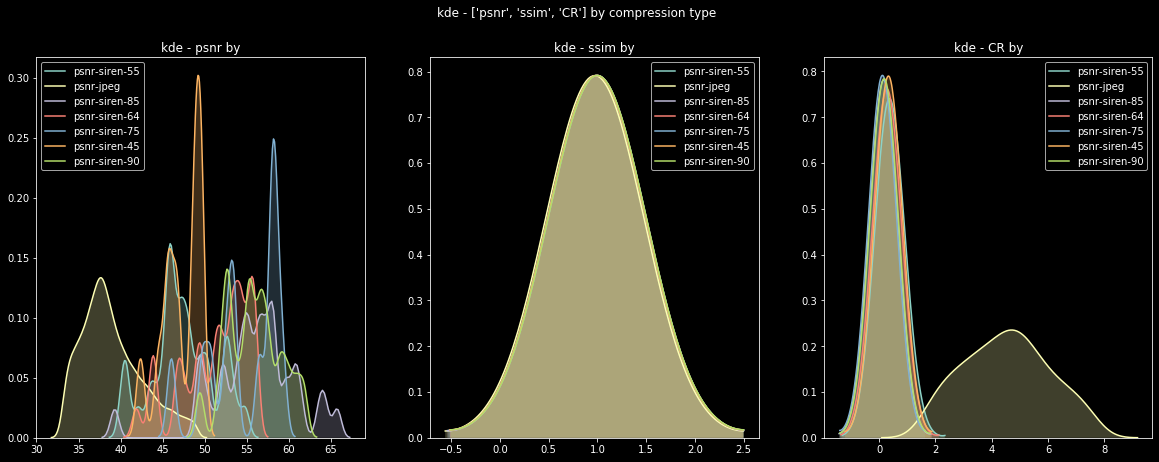

In [44]:
target_features = 'psnr,ssim,CR'.split(",")
fig, axes = plt.subplots(1, len(target_features), figsize = (20, 7))
for pos, target_feature in enumerate(target_features):
    for c in set(merged_df['compression'].values):
        sns.kdeplot(merged_df[merged_df['compression'] == f'{c}'][f'{target_feature}'], shade=True, bw=.5, label = f'psnr-{c}', ax = axes[pos])
        pass
    axes[pos].set_title(f'kde - {target_feature} by')
    pass
fig.suptitle(f'kde - {target_features} by compression type')
plt.show()

In [47]:
x = 'bpp'; y = "ssim"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}")
fig.show()

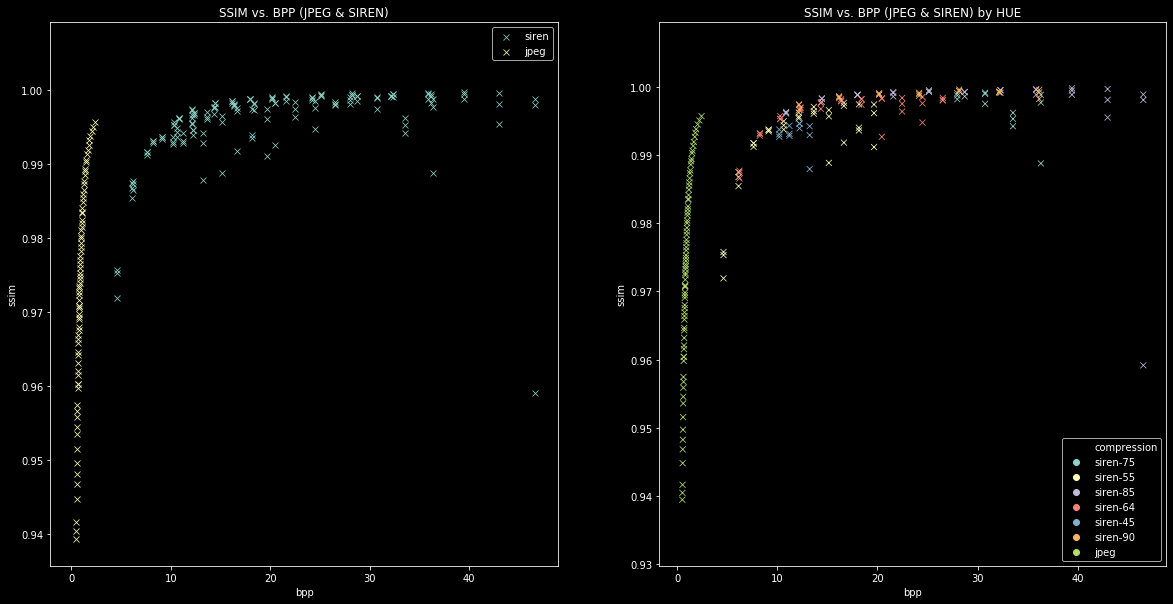

In [48]:
x = 'bpp'; y = "ssim"

fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by HUE')
plt.show()

In [51]:
x = 'bpp'; y = "CR"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}")
fig.show()

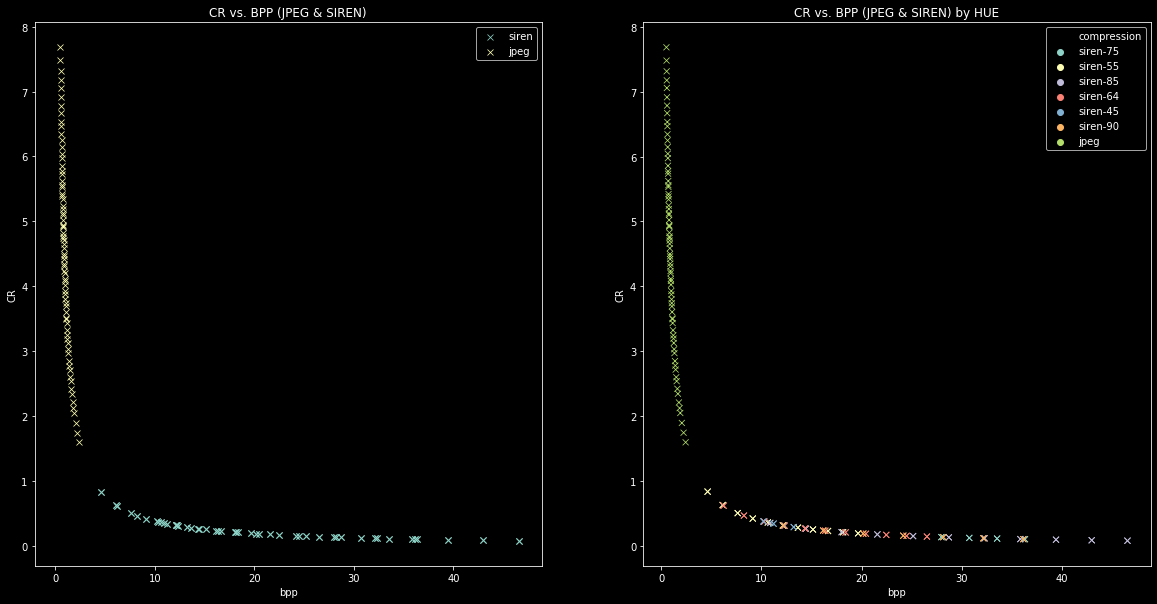

In [49]:
x = 'bpp'; y = "CR"

fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by HUE')
plt.show()

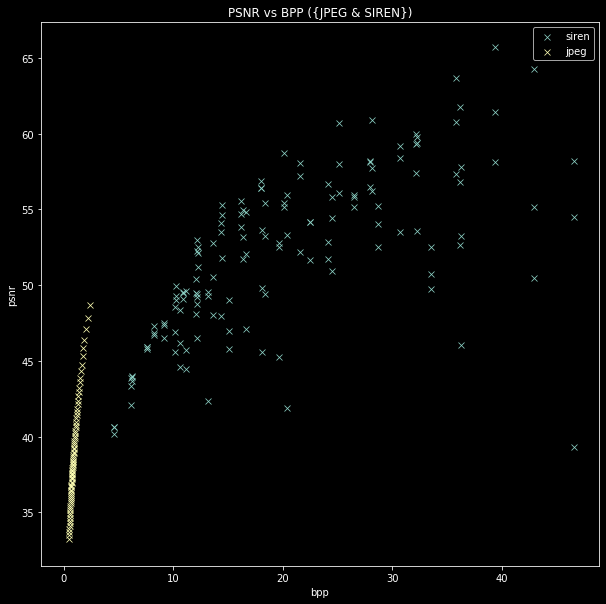

In [52]:
# compare_compressions(compression_1_df=train_df, compression_2_df=result_jpeg_df)

fig = plt.figure(figsize = (10, 10))
sns.scatterplot(data = siren_df, x = 'bpp', y = 'psnr', label = 'siren', marker = 'x')
sns.scatterplot(data = jpeg_df, x = 'bpp', y = 'psnr', label = 'jpeg', marker = 'x')

plt.title('PSNR vs BPP ({JPEG & SIREN})')
plt.show()

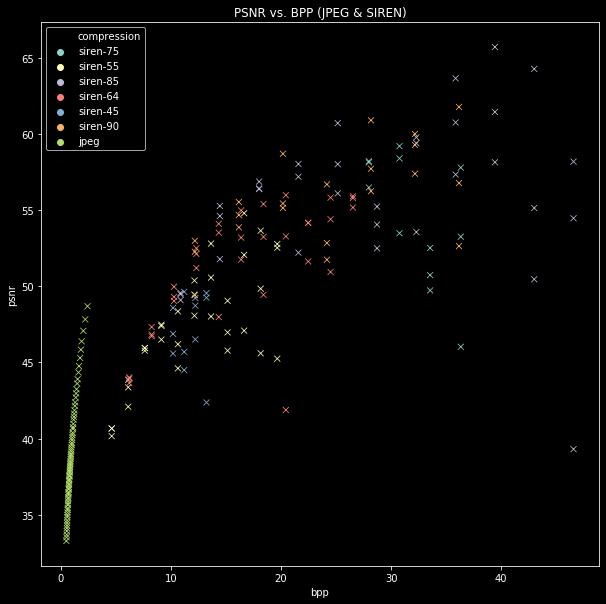

In [53]:
hue = "compression"; x = 'bpp'; y = "psnr"
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")[0:1]

fig, ax = plt.subplots(1, len(y_vars[0:1]), figsize = (10, 10))
# fig.suptitle(f"{x} vs. others")

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
ax.set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

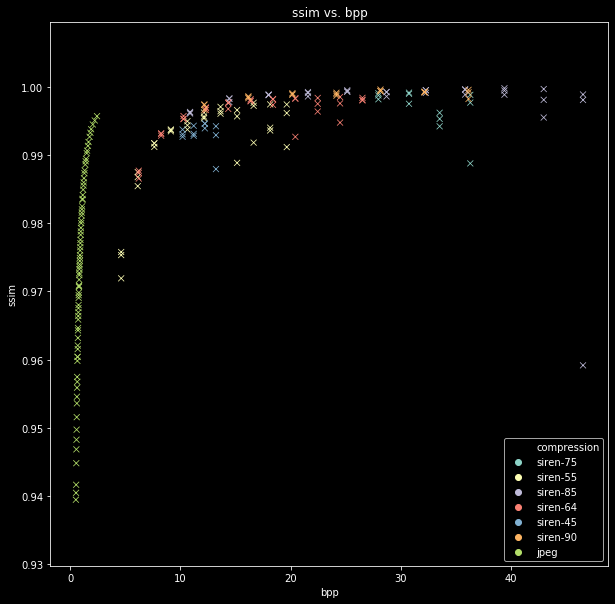

In [54]:
hue = "compression"; x = 'bpp'; y = "ssim"
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")[0:1]

fig, ax = plt.subplots(1, len(y_vars[0:1]), figsize = (10, 10))
# fig.suptitle(f"{x} vs. others")

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
ax.set_title(f'{y} vs. {x}')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

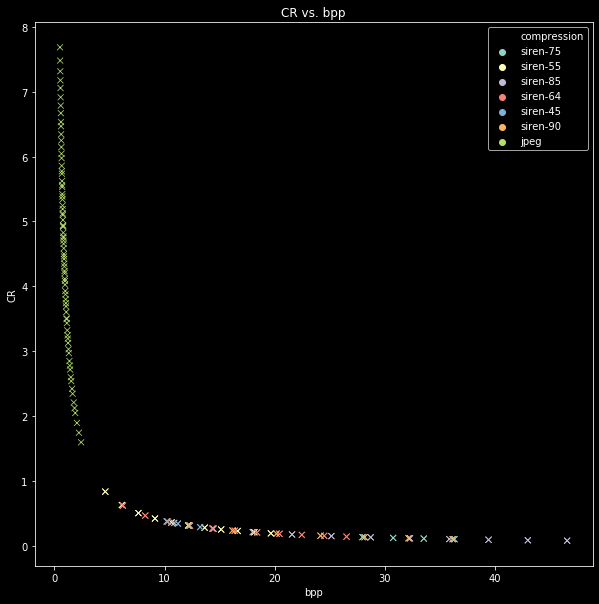

In [55]:
hue = "compression"; x = 'bpp'; y = "CR"
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")[0:1]

fig, ax = plt.subplots(1, len(y_vars[0:1]), figsize = (10, 10))
# fig.suptitle(f"{x} vs. others")

sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
ax.set_title(f'{y} vs. {x}')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

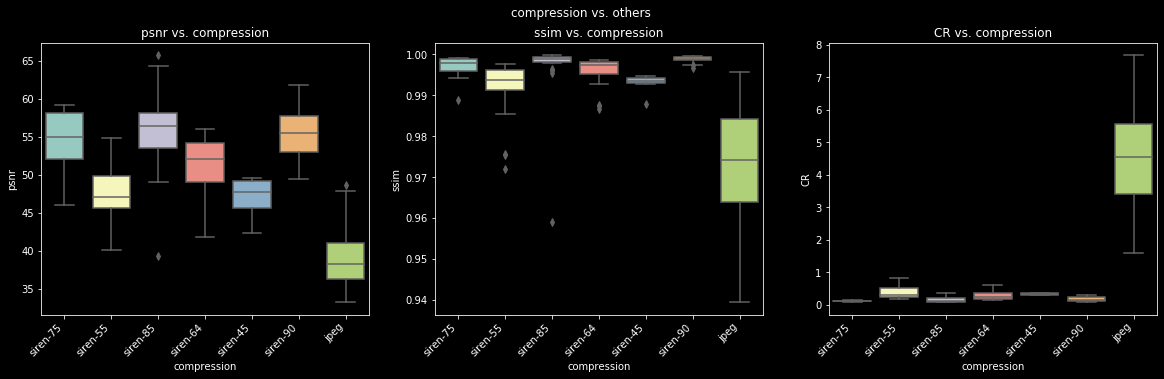

In [57]:
x = 'compression'
y_vars = "psnr,ssim,CR".split(",")[:]

fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")

for ax, y in zip(axes, y_vars):
    chart = sns.boxplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax)
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

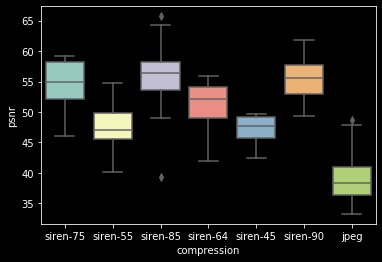

In [58]:
sns.boxplot(x="compression", y="psnr", data=merged_df)
plt.show()

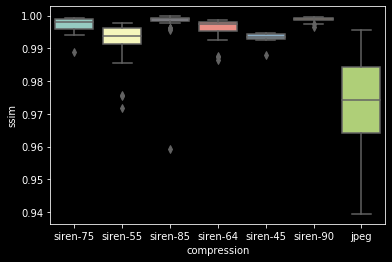

In [59]:
sns.boxplot(x="compression", y="ssim", data=merged_df)
plt.show()

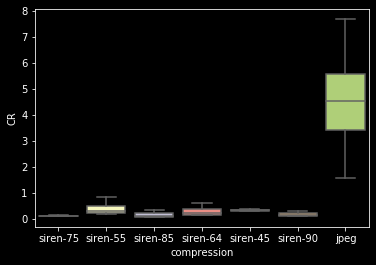

In [60]:
sns.boxplot(x="compression", y="CR", data=merged_df)
plt.show()

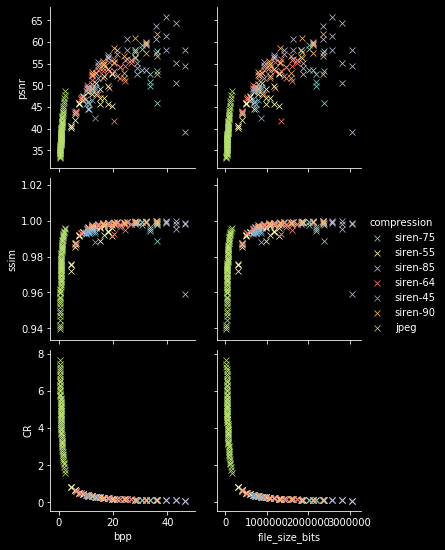

In [61]:
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

g = sns.PairGrid(merged_df, x_vars=x_vars, y_vars=y_vars, hue=hue)
g.map(sns.scatterplot, marker='x')
g.add_legend()
# g.savefig("compare_compressions_metrices.png")
plt.show()

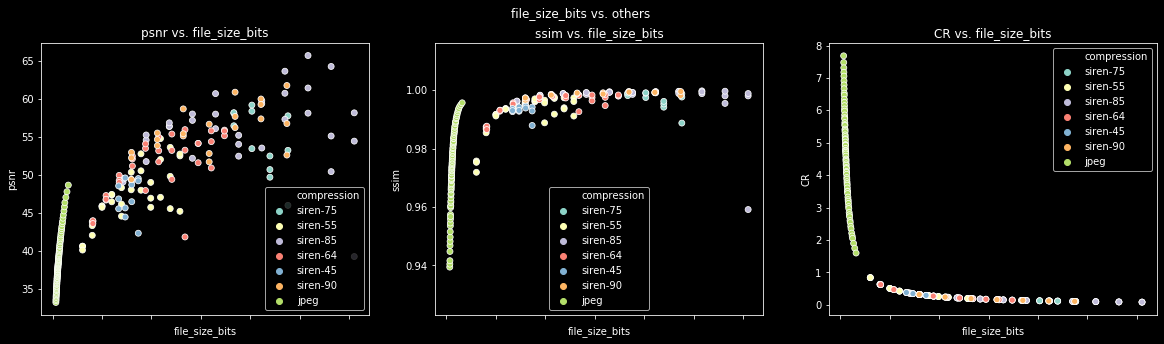

In [62]:
x = 'file_size_bits'; hue = "compression"
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")

fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")

for ax, y in zip(axes, y_vars):
    chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression')
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

In [63]:
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]

In [64]:
# ?sns.lmplot

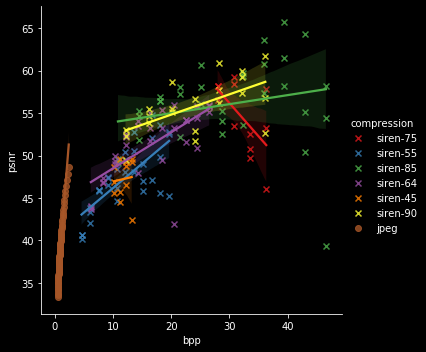

In [74]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="psnr", hue="compression",
    height=5,
    order=1,
    palette="Set1", markers=markers
).fig.subplots_adjust(wspace=.02)

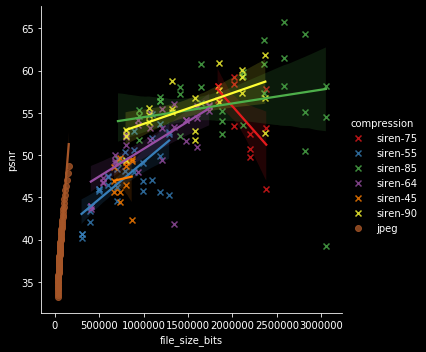

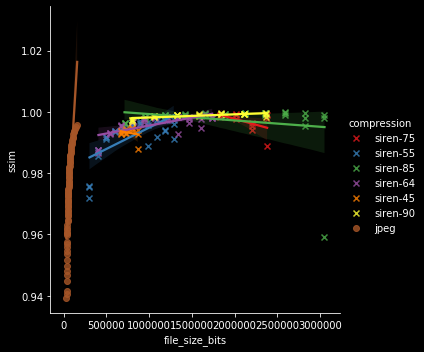

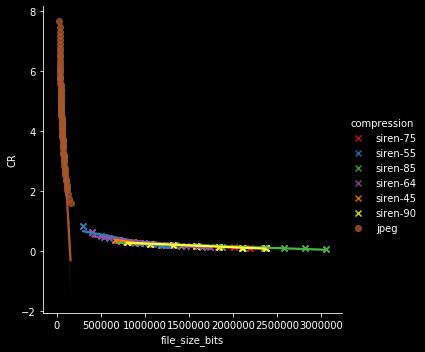

In [66]:
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="psnr", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="ssim", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="CR", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

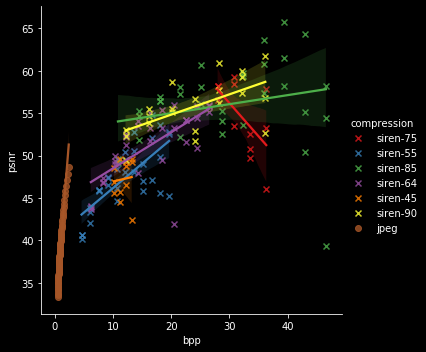

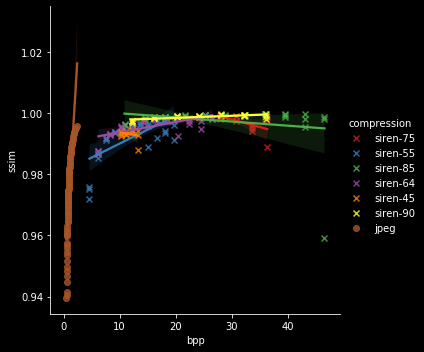

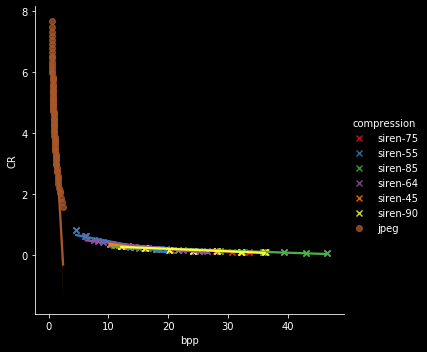

In [67]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="psnr", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="ssim", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="CR", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

### References:
---
#### Standard Libs:
  - [Lib/statistics.py](https://docs.python.org/3/library/statistics.html)
---
#### Seaborn:
  - [seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=reg)
---
#### Drawing from data:
  - [drawingfromdata](https://www.drawingfromdata.com/)
  - [HOW TO ROTATE AXIS LABELS IN SEABORN AND MATPLOTLIB](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib)